# Regressão Linear

Neste curso, iremos estabelecer o preço de venda de casas, analisando as diversas características que influenciam sua precificação. Para alcançar esse objetivo, vamos utilizar a regressão linear como metodologia.

Utilizamos como inspiração a famosa base de dados House Price do Kaggle. Fizemos algumas transformações na base original para garantir um melhor aprendizado das técnicas apresentadas neste curso.



### Dicionário de variáveis:
Confira abaixo os campos disponíveis para análise:

* **area_primeiro_andar**: Refere-se à área do primeiro andar da propriedade, medida em metros quadrados.
existe_segundo_andar: Esta variável é binária, indicando se a propriedade possui ou não um segundo andar. Pode ser representada como 1 para "sim" e 0 para "não".
*  **area_segundo_andar**: Se a propriedade tiver um segundo andar, esta variável representa a área total do segundo andar, medida em metros quadrados.
* **quantidade_banheiros**: Indica o número total de banheiros na propriedade.
* **capacidade_carros_garagem**: Esta variável indica a capacidade da garagem da propriedade, ou seja, o número máximo de carros que podem ser estacionados na garagem.
* **qualidade_da_cozinha_Excelente**: Esta é uma variável categórica que avalia a qualidade da cozinha na propriedade. Neste caso, assume-se que se a cozinha for considerada "Excelente" é representada por 1, e caso contrário, por 0.
* **preco_de_venda**: Este é o preço de venda da propriedade em reais. É a variável alvo que se tenta prever usando os outros atributos da propriedade.


### Quais fatores contribuem para estabelecer o preço de venda de uma casa?

In [1]:
# Carregando os dados
import pandas as pd

raw_csv = 'Preços_de_casas.csv'
dados = pd.read_csv(raw_csv)
dados.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1438 entries, 0 to 1437
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Id                              1438 non-null   int64  
 1   area_primeiro_andar             1438 non-null   float64
 2   existe_segundo_andar            1438 non-null   int64  
 3   area_segundo_andar              1438 non-null   float64
 4   quantidade_banheiros            1438 non-null   int64  
 5   capacidade_carros_garagem       1438 non-null   int64  
 6   qualidade_da_cozinha_Excelente  1438 non-null   int64  
 7   preco_de_venda                  1438 non-null   float64
dtypes: float64(3), int64(5)
memory usage: 90.0 KB


In [2]:
# Visualizando as 5 primeiras linhas do dataframe.
dados.head()

,Id,area_primeiro_andar,existe_segundo_andar,area_segundo_andar,quantidade_banheiros,capacidade_carros_garagem,qualidade_da_cozinha_Excelente,preco_de_venda
0,1,79.5224,1,79.3366,2,548,0,1027905.0
1,2,117.2398,0,0.0000,2,460,0,894795.0
2,3,85.4680,1,80.4514,2,608,0,1101855.0
3,4,89.2769,1,70.2324,1,642,0,690200.0
4,5,106.3705,1,97.8237,2,836,0,1232500.0


In [3]:
# A coluna ID naão será importante para a nossa análise de definição de preço
dados.drop(columns='Id', inplace=True)
dados.head()

,area_primeiro_andar,existe_segundo_andar,area_segundo_andar,quantidade_banheiros,capacidade_carros_garagem,qualidade_da_cozinha_Excelente,preco_de_venda
0,79.5224,1,79.3366,2,548,0,1027905.0
1,117.2398,0,0.0000,2,460,0,894795.0
2,85.4680,1,80.4514,2,608,0,1101855.0
3,89.2769,1,70.2324,1,642,0,690200.0
4,106.3705,1,97.8237,2,836,0,1232500.0


### Mão na massa: heatmap de correlação

Vamos praticar o conceito de correlação?

Durante a aula, exploramos a correlação entre cada característica da casa com seu preço; no entanto, o coeficiente de correlação também pode ser aplicado para qualquer dupla de variáveis.

Nesta atividade, analise a correlação de todas as variáveis através de uma forma visual, executando o código abaixo em uma célula do seu notebook.

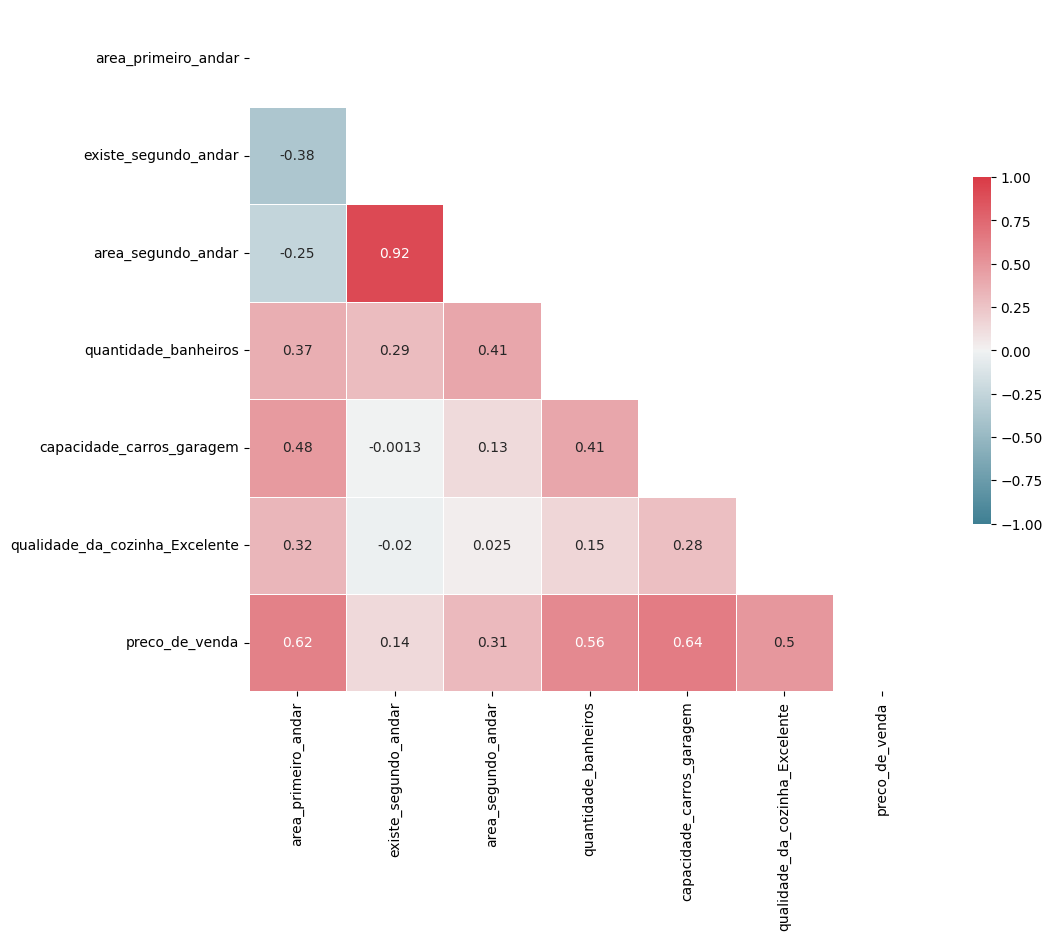

In [4]:
# Atividade

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



# Correlação
corr = dados.corr()

# Quais fatores estão mais correlacionados?

# Gerar uma máscara para o triângulo superior
mascara = np.zeros_like(corr, dtype=bool)
mascara[np.triu_indices_from(mascara)] = True

# Configurar a figura do matplotlib
f, ax = plt.subplots(figsize=(11, 9))

# Gerar o mapa de calor (heatmap)
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mascara, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})

# Exibir o mapa de calor (heatmap)
plt.show()

**Dica**: Atente-se nos pontos abaixo para uma análise completa:

* **Intensidade**: refere-se à força da relação entre as variáveis medidas. Pode variar de -1 a +1, onde -1 indica uma correlação perfeitamente negativa, +1 indica uma correlação perfeitamente positiva e 0 indica ausência de correlação linear.
* **Direção**: refere-se à natureza da relação entre as variáveis medidas. Uma correlação positiva indica que as variáveis aumentam ou diminuem juntas, enquanto uma correlação negativa indica que uma variável aumenta enquanto a outra diminui, ou vice-versa.
**Exemplo**:

O coeficiente de correlação linear entre a área do primeiro andar e o preço de venda é de 0.62, indicando uma correlação positiva moderadamente forte (intensidade). Em geral, à medida que a área do primeiro andar de uma casa aumenta, o preço de venda também tende a aumentar (direção).


In [5]:
import plotly.express as px
px.scatter(dados, x='area_primeiro_andar', y='preco_de_venda', trendline_color_override='red', trendline='ols')

Nessa aula, você aprendeu a:
* Obter o coeficiente de correlação dos dados;
* Analisar a intensidade e a direção da correlação entre duas variáveis;
* Identificar linearidade no gráfico de dispersão;
* Diferenciar variável explicativa de variável resposta;
* Visualizar a melhor reta utilizando o Plotly.

## 02 - Explicando a reta - Treino e Teste

### Para saber mais: estimação da regressão linear simples

A regressão linear foi a metodologia que ajustou a melhor reta que representa linearmente a interação entre X e Y; no nosso caso, o tamanho da área do primeiro andar e o preço de venda da casa.

Vale recapitular cada componente da regressão linear:
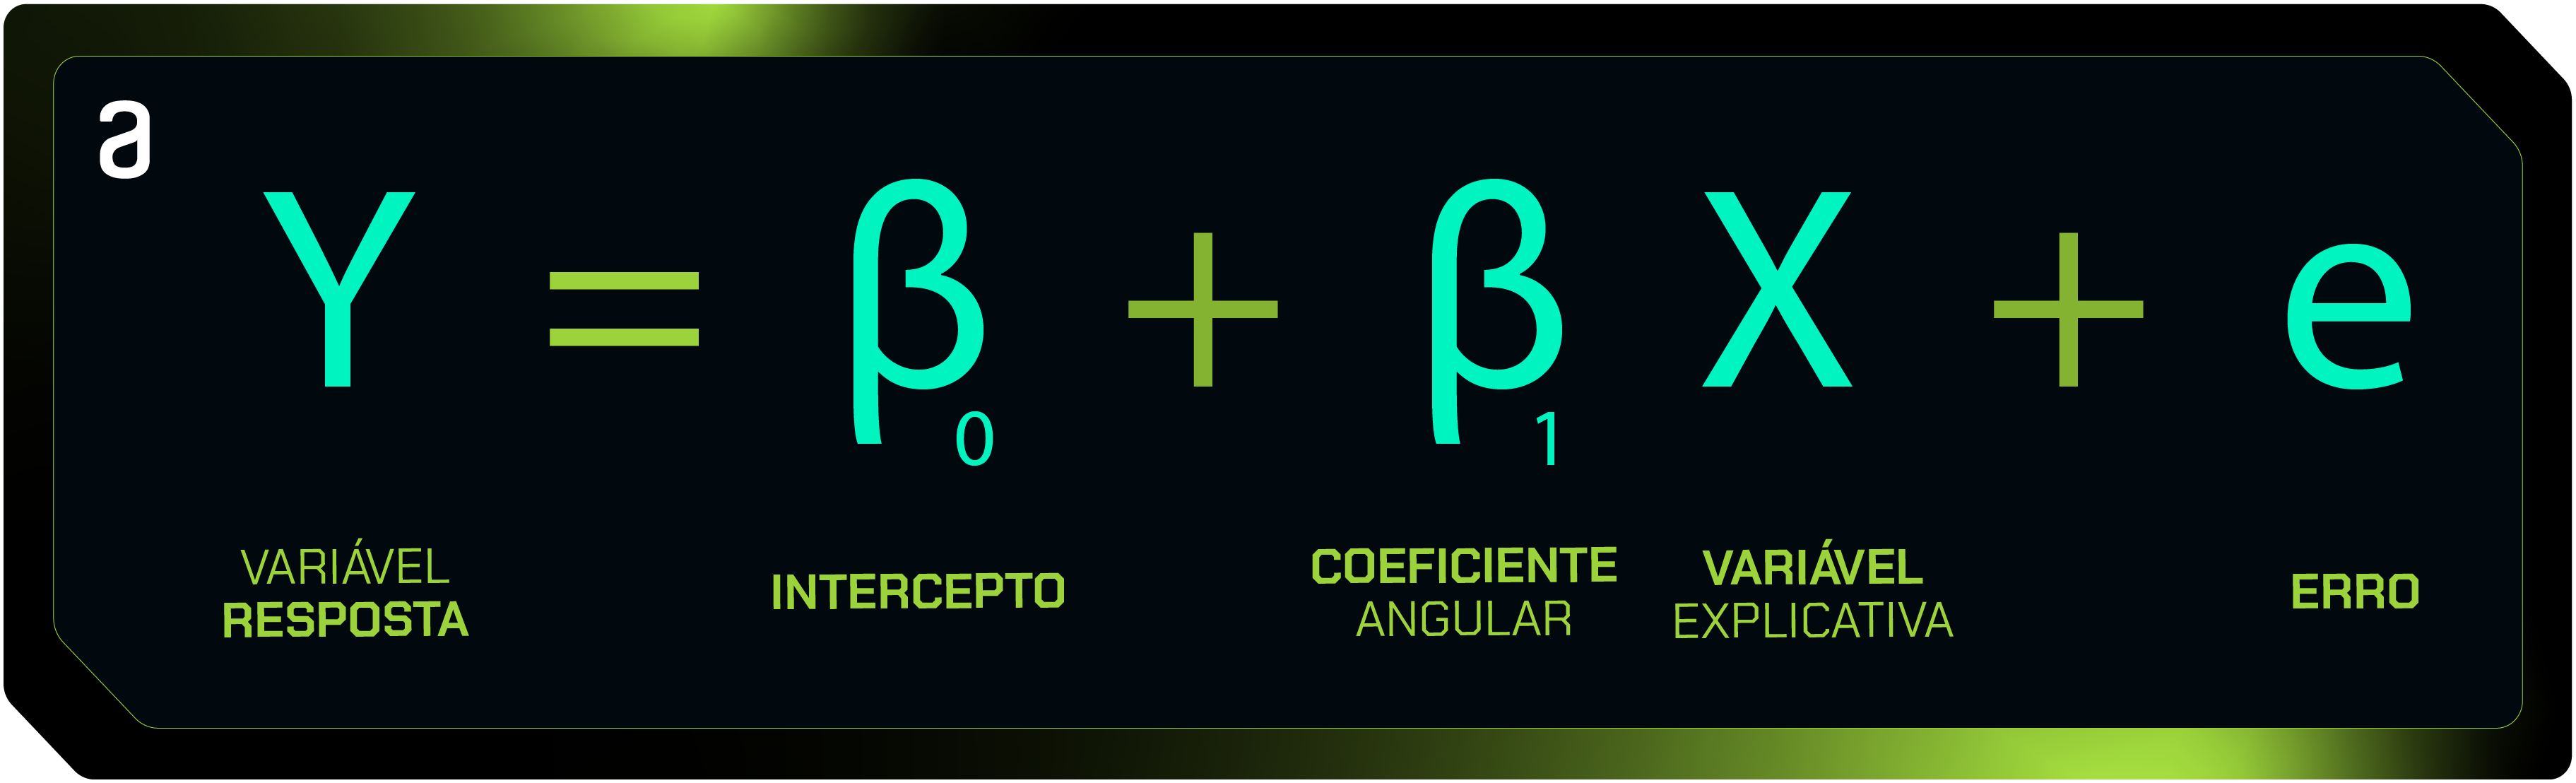


* **Variável Resposta (Y)**: Também chamada de variável dependente é aquela que estamos tentando prever.
* **Intercepto (β₀)**: O ponto onde a linha de regressão intercepta o eixo vertical (Y), ou seja, o valor de Y quando X é igual a 0.
* **Variável Explicativa (X)**: Também chamada de variável independente e é o fator que usamos para prever e explicar a variável resposta.
* **Coeficientes de Regressão (β₁)**: Impacto de cada variável explicativa X na variável resposta, é o efeito de X em Y.
* **Erro Residual (e)**: Diferença entre os valores reais e previstos da variável resposta.
### Coeficientes
A relação linear entre as variáveis X e Y é representada graficamente por uma linha. Este processo de encontrar a linha ideal envolve minimizar a distância entre os pontos reais e a própria linha.

O ajuste da linha de regressão linear é simplificado pelo método dos mínimos quadrados. Este método visa encontrar a linha que melhor se ajusta aos dados observados, minimizando a soma dos quadrados das diferenças entre os valores reais e os valores previstos pela linha e calculando os coeficientes do modelo.

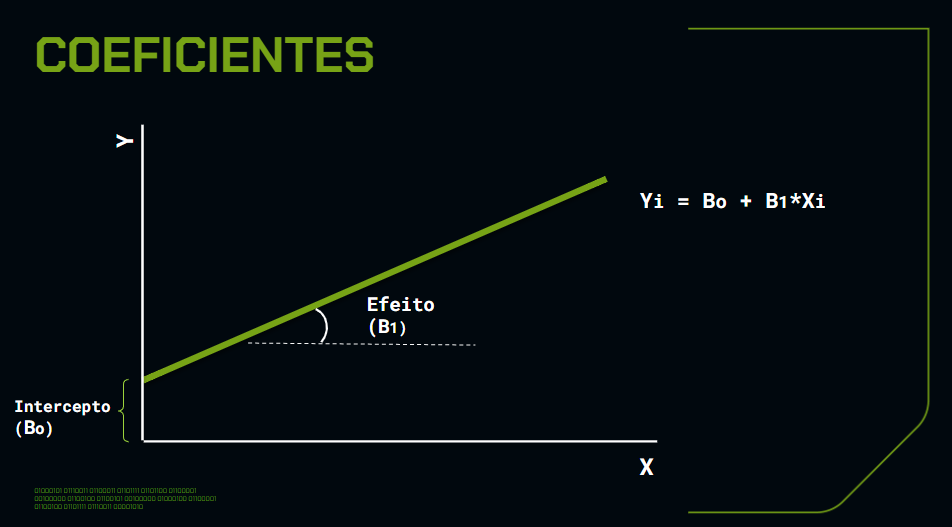



### Para saber mais: explicabilidade

O coeficiente de determinação, frequentemente chamado de R², é uma medida estatística que indica o quanto a variabilidade da variável dependente (resposta) é explicada pelo modelo de regressão linear.

#### Interpretando o R²
Ele varia de 0 a 1, um valor próximo de 1 indica que o modelo ajusta bem os dados, explicando a maioria da variação na variável dependente/resposta. Já um valor próximo de 0 indica que o modelo não consegue explicar muita variação na variável dependente/resposta.

#### Usando no teste
Além disso, o R² pode ser usado para comparar o desempenho do modelo em diferentes conjuntos de dados, como treinamento e teste. Isso ajuda a identificar problemas de overfitting (ajuste excessivo) ou underfitting (ajuste insuficiente). Idealmente, desejamos que o R² seja consistente entre os conjuntos de treinamento e teste, indicando uma boa capacidade de generalização do modelo para novos dados.

#### Fórmula
Uma das fórmulas do R² pode ser representada pela razão entre a variação explicada e pela variação total. Por isso que dizemos que quanto mais perto do 1 melhor é adequação do modelo, já que a variação explicada será mais próxima da variação total nessa razão.

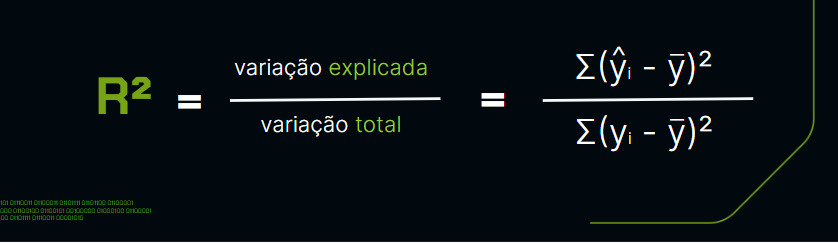


### Faça como eu fiz: analisando a variável resposta

Durante esta aula, focamos em analisar o comportamento da variável resposta, ou seja, compreender o preço de venda da casa.

Para isso, fizemos um histograma como recurso visual para facilitar essa análise.

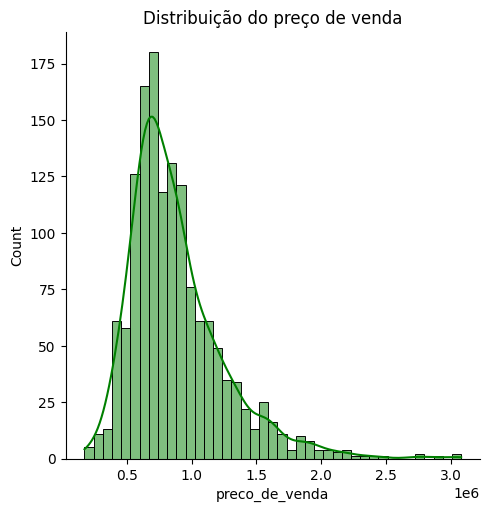

In [6]:
sns.displot(dados['preco_de_venda'], kde=True, color='green')
plt.title('Distribuição do preço de venda')
plt.show()

Nesta atividade, aplique a função displot da biblioteca Seaborn (sns) e explore os aspectos da visualização de dados. Para isso, utilize seus conhecimentos adquiridos até o momento e desenvolva suas habilidades ainda mais.

Esta função é usada para criar um gráfico de distribuição. O parâmetro kde=True indica que queremos traçar a densidade de kernel estimada sobre o histograma. Através deste exercício prático, você terá a possibilidade de visualizar a forma da distribuição com mais suavidade.

### O que aprendemos?

Nessa aula, você aprendeu a:
* Dividir a base de dados para treinar e testar o modelo;
* Interpretar os coeficientes de regressão linear simples;
* Calcular e interpretar o coeficiente de determinação R²;
* Analisar o quanto cada ponto de dados desvia da linha de regressão ajustada através dos resíduos;
* Compreender quão bem os valores observados se ajustam ao modelo de regressão com R²;
* Calcular o R² no conjunto teste.

## 3 - Analisando outros fatores com pairplot

#### Importância das variáveis

Imagine que você é um(a) analista de dados trabalhando no **Banco Bytebank**. Esse banco deseja oferecer aos seus clientes empréstimos com taxas de juros mais precisas, baseadas em uma análise detalhada do valor das propriedades. Para isso, você deve desenvolver um modelo de regressão linear que possa prever o preço de venda de casas com base em diversas características.

Inicialmente, você ajustou um modelo, utilizando apenas o tamanho do primeiro andar como variável. No entanto, para aprimorar seu modelo, você decide explorar outros fatores que podem influenciar o preço de venda, utilizando a ferramenta pairplot para visualizar as relações entre essas variáveis e o preço.

Quais das seguintes afirmações melhor descreve a importância de incluir múltiplas variáveis explicativas no modelo de regressão linear?


    a) Incluir múltiplas variáveis explicativas no modelo de regressão linear permite uma avaliação mais aprofundada das interações indiretas entre variáveis, mesmo que essas interações não tenham uma relação direta com o preço de venda, possibilitando insights inesperados sobre fatores subjacentes.


    b) Utilizar múltiplas variáveis explicativas pode ser útil para identificar variáveis redundantes ou irrelevantes, o que, embora não melhore diretamente a precisão das previsões, contribui para a compreensão da estrutura dos dados e das relações entre as características.


    c) A adição de mais variáveis explicativas ao modelo pode introduzir uma complexidade benéfica, permitindo que o modelo capture padrões mais sutis nos dados, mesmo que essas novas variáveis não sejam maiores em escala que o tamanho do primeiro andar.


    d)Incluir variáveis adicionais, como a cor externa da casa e o estilo da maçaneta da porta, pode revelar preferências estéticas e tendências de mercado que, embora não estejam diretamente ligadas ao preço, podem oferecer perspectivas valiosas sobre o comportamento do comprador.


    e) Ao adicionar mais variáveis explicativas relacionadas ao preço de venda das casas, o modelo se torna menos propenso a viés, pois considera uma gama mais ampla de características que afetam o valor do imóvel, proporcionando estimativas mais precisas.v(correct answer)

### O papel do R² na seleção do modelo


Em um projeto de análise de dados, um cientista de dados compara quatro modelos estatísticos para prever o preço das casas. Cada modelo usa um conjunto diferente de variáveis explicativas. O cientista observa que os modelos com mais variáveis têm valores de R² mais altos, porém está ciente de que isso pode não ser o único fator para escolher o melhor modelo. Com base nesta situação, qual das seguintes afirmações é a mais adequada para selecionar o modelo mais apropriado? Escolha uma alternativa.

    a) O modelo deve ser selecionado levando em consideração apenas o condition number nesse caso.


    b) Escolha o modelo com o maior R², pois isso indica que o modelo tem a melhor capacidade de explicar a variabilidade dos preços das casas.


    c) Prefira o modelo com o R² ajustado mais alto, pois ele leva em consideração o número de variáveis explicativas, ajudando a evitar o sobreajuste. (Correct answer)


    d) Selecione o modelo com menos variáveis explicativas para evitar a complexidade desnecessária, independentemente dos valores de R².

### Para saber mais: refinando a seleção de modelos


Na aula sobre comparação de modelos de regressão linear, exploramos como avaliar e selecionar o modelo mais adequado usando o R² e outros critérios. Além da seleção manual que discutimos, existem métodos automáticos de seleção de variáveis que podem ser extremamente úteis em situações onde o número de variáveis explicativas é grande. Esses métodos, como stepwise, backward e forward selection, seguem critérios pré-definidos para adicionar ou remover variáveis do modelo de forma iterativa. Explore a seguir os métodos automáticos de seleção de variáveis, que visam equilibrar a complexidade do modelo e sua capacidade explicativa.

O método forward selection começa com um modelo sem variáveis explicativas e adiciona uma a uma, escolhendo em cada passo a variável que mais melhora o modelo de acordo com um critério estatístico específico, como o menor valor de p-valor ou o maior aumento no R² ajustado.
O backward selection inicia com todas as variáveis possíveis no modelo e, iterativamente, remove a variável que menos contribui para o modelo, novamente baseando-se em critérios como o p-valor ou o impacto no R² ajustado.
O stepwise selection é uma combinação dos dois métodos anteriores, onde as variáveis podem ser adicionadas ou removidas em cada passo, dependendo de sua contribuição para o melhoramento do modelo.
Esses métodos de seleção automática são ferramentas poderosas que ajudam na identificação do modelo mais parcimonioso, ou seja, aquele que consegue explicar os dados de maneira eficiente sem ser excessivamente complexo. Contudo, é crucial que o cientista de dados compreenda e supervisione o processo, pois a escolha automática pode, às vezes, introduzir viés ou sobreajuste, especialmente se o critério de seleção não for bem escolhido ou se o modelo não for validado adequadamente com dados novos ou de teste.

### Mão na massa: análise e seleção de modelos de regressão linear

Como pessoa Cientista de Dados, você está encarregada pela análise do problema de precificação de quartos de hotéis, fazendo uso do conjunto de dados fornecidos. 

Nesta atividade, sua tarefa envolve conduzir as seguintes etapas:

1. análise inicial com o PairPlot da Seaborn;
2. construir modelos de regressão linear; e
3. realizar a comparação desses modelos.

In [7]:
raw_hoteis = 'hoteis.csv'
dados_hoteis = pd.read_csv(raw_hoteis)
dados_hoteis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Estrelas            1000 non-null   int64  
 1   ProximidadeTurismo  1000 non-null   float64
 2   Capacidade          1000 non-null   int64  
 3   Preco               1000 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 31.4 KB


In [8]:
dados_hoteis.head()

,Estrelas,ProximidadeTurismo,Capacidade,Preco
0,5,9.301565,3,506.275452
1,1,1.785891,1,246.363458
2,4,15.504293,3,325.873550
3,4,4.173188,3,521.343284
4,4,9.443685,1,252.587087


## 4 - Precificando as Casas